# Packages Installs, imports, and presets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.3/802.3 kB 34.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyli

In [ ]:
!pip install scapy feature-engine
!pip install catboost shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 24.4 MB/s eta 0:00:00
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444327 sha256=92d91e4d96508f77de0a7fe5ee7fe2246fadca7f72b0b3a877148adb442a1fb6
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependen

In [ ]:
from scapy.all import *
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from collections import defaultdict
import os
from transformers import AutoImageProcessor, MobileViTV2Model
import torch
from catboost import CatBoostClassifier
import shap
from catboost import Pool

In [ ]:
INPUT_SIZE = (256,256,3)

# Data exploration

In [ ]:
def get_attack_directory_attack(path):
  return path[29:]
attacks_directories= [
                      # '20200425_UOWM_IEC104_Dataset_m_sp_na_1_DoS',
                      '20200426_UOWM_IEC104_Dataset_c_ci_na_1',
                      # '20200427_UOWM_IEC104_Dataset_c_se_na_1',
                      # '20200428_UOWM_IEC104_Dataset_c_sc_na_1',
                      # '20200605_UOWM_IEC104_Dataset_c_rd_na_1',
                      # '20200606_UOWM_IEC104_Dataset_c_rp_na_1',
                      '20200426_UOWM_IEC104_Dataset_c_ci_na_1_DoS',
                      # '20200605_UOWM_IEC104_Dataset_c_rd_na_1_DoS',
                      # '20200606_UOWM_IEC104_Dataset_c_rp_na_1_DoS',
                      # '20200428_UOWM_IEC104_Dataset_c_se_na_1_DoS',
                      # '20200429_UOWM_IEC104_Dataset_c_sc_na_1_DoS',
                                            # '20200608_UOWM_IEC104_Dataset_mitm_drop'
                                            ]
get_attack_directory_attack(attacks_directories[0])

'c_ci_na_1'

In [ ]:
# df =pd.concat([pd.read_parquet(f"/content/drive/My Drive/IEC104/{attack_directory}.parquet").sample(20000) for attack_directory in attacks_directories ])
df =pd.concat([pd.read_parquet(f"/content/drive/My Drive/IEC104/{attack_directory}.parquet") for attack_directory in attacks_directories ])

<Axes: >

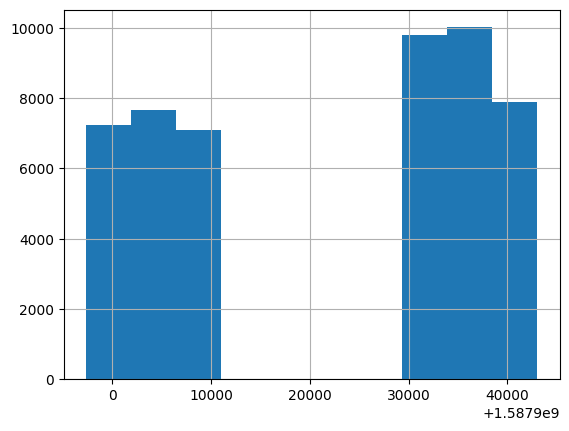

In [ ]:
df.tv_sec.hist()

In [ ]:
df.groupby('flow')['label'].nunique().max()

2

In [ ]:
df.head()

,tv_sec,tv_usec,ipv4_ver_0,ipv4_ver_1,ipv4_ver_2,ipv4_ver_3,ipv4_hl_0,ipv4_hl_1,ipv4_hl_2,ipv4_hl_3,...,payload_bit_375,payload_bit_376,payload_bit_377,payload_bit_378,payload_bit_379,payload_bit_380,payload_bit_381,payload_bit_382,payload_bit_383,label
flow,,,,,,,,,,,,,,,,,,,,,
192.168.1.20_192.168.1.21_49597_2404_TCP,1587897341,169881,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
192.168.1.21_192.168.1.20_2404_49597_TCP,1587897341,170416,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
192.168.1.20_192.168.1.24_49598_2404_TCP,1587897347,789384,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
192.168.1.24_192.168.1.20_2404_49598_TCP,1587897347,789845,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal
192.168.1.20_192.168.1.21_49597_2404_TCP,1587897355,535568,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,normal


## Flow creation by timeout

tv_sec
2         40
3       1206
5        285
6        738
7         94
8         34
9         64
10        23
11        14
12         9
13         3
16         2
19         2
21         1
22         1
23         2
24         2
27         1
28         1
41         2
93         1
96         1
133        1
136        1
138        1
139        1
141        1
144        1
220        1
224        1
225        1
234        1
277        1
278        1
1132       1
1133       2
1143       1
1147       1
1150       2
1229       1
1232       1
1233       1
1239       2
1246       1
1247       1
1250       1
1254       1
1255       2
1257       1
1265       1
1269       1
1367       1
1398       1
1402       1
1405       1
1409       1
1415       1
1427       1
Name: count, dtype: int64


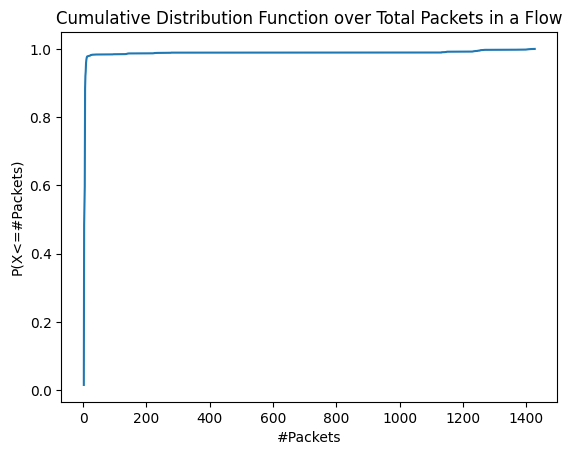

In [ ]:
def plot_cdf(x):
  plt.title('Cumulative Distribution Function over Total Packets in a Flow')
  plt.xlabel("#Packets")
  plt.ylabel(r"P(X<=#Packets)")
  # print(x)
  plt.plot(x)
tmp=df.groupby('flow')['tv_sec'].count().value_counts().sort_index()
print(tmp)
tmp=tmp.cumsum()

tmp = tmp/tmp.max()

plot_cdf(tmp)

In [ ]:
df.shape

(49691, 1347)

In [ ]:
from tqdm import tqdm

In [ ]:
df=df.sort_values(by=['flow','tv_sec','tv_usec'],axis=0,ascending=True)

In [ ]:
%%time
TIMEOUT = 120
from collections import defaultdict
last_timestamp = defaultdict(lambda: 0)
flow_bin = defaultdict(lambda: 0)
splits = []
for c,r in tqdm(df.iterrows()):
  flow_id = c+'_'+r['label']
  if (r['tv_sec'] - last_timestamp[flow_id] ) >= TIMEOUT:# in the first packet of a flow it's always true
    flow_bin[flow_id] += 1
  splits.append(f"{flow_bin[flow_id]}_{flow_id}")
  last_timestamp[flow_id] = r['tv_sec']
df['flow'] = splits
del splits
df=df.set_index('flow')

49691it [00:09, 5409.50it/s] 


CPU times: user 5.83 s, sys: 2.07 s, total: 7.91 s
Wall time: 9.76 s


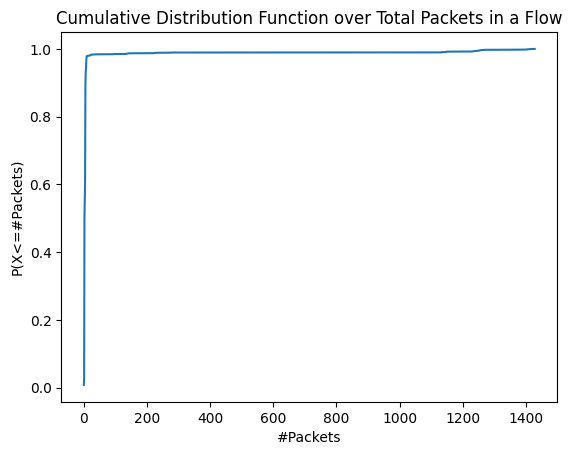

In [ ]:
tmp=df.groupby('flow')['tv_sec'].count().value_counts()
tmp=tmp.sort_index().cumsum()
tmp = tmp/tmp.max()
plot_cdf(tmp)

In [ ]:
pd.Series(df.index).nunique()

2632

In [ ]:
df.groupby('flow')['label'].nunique().max()

1

In [ ]:
df.groupby('flow')['tv_sec'].count().value_counts()

tv_sec
1      1154
2      1037
3       561
4       202
5        70
       ... 
434       1
463       1
121       1
83        1
425       1
Name: count, Length: 144, dtype: int64

In [ ]:
indexes=df.groupby('flow')['tv_sec'].count().sort_values(ascending=False).iloc[:4].index

## Removing missing features

In [ ]:

from matplotlib.colors import LinearSegmentedColormap
colors = [(1, 0, 0), (0.5, 0.5, 0.5), (0, 1, 0)]  # Red, Grey, Green

# Define the corresponding values normalized between 0 and 1
values = [-1, 0, 1]
norm = plt.Normalize(min(values), max(values))

# Create the colormap
cmap = LinearSegmentedColormap.from_list("CustomMap", list(zip(norm(values), colors)))


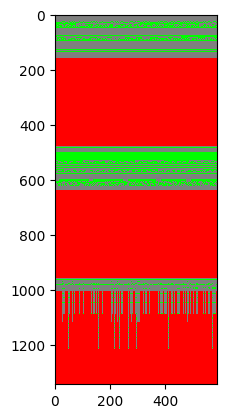

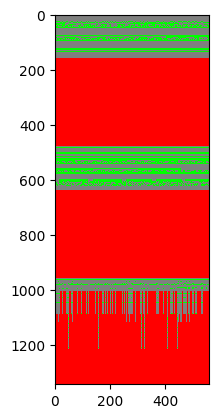

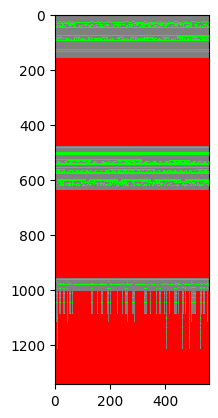

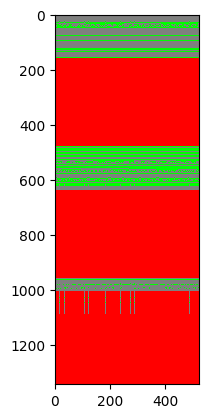

In [ ]:
for i in indexes:
  x=i
  tmp = df.loc[x]
  tmp
  tmp= tmp.sort_values(by=['tv_sec','tv_usec'],axis=0,ascending=True)
  plt.imshow(
  tmp.drop(['tv_sec','tv_usec','label'],axis=1).to_numpy().T, interpolation='none',cmap=cmap)
  plt.show()

In [ ]:
df=df.drop([c for c,v in ((df==-1).sum() == len(df)).items() if v==True],axis=1)

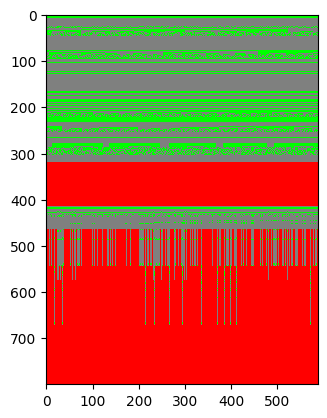

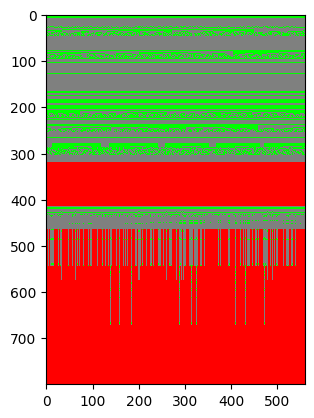

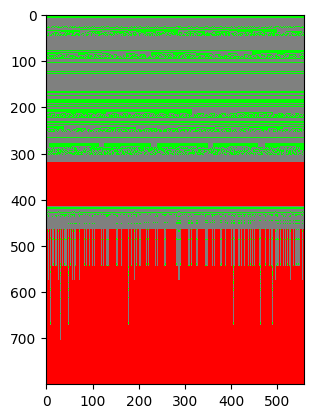

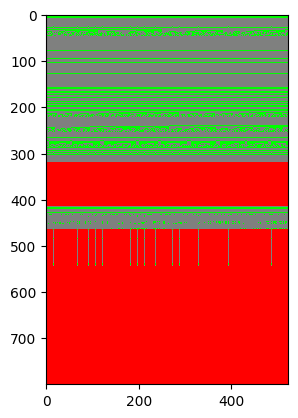

In [ ]:
# tmp = df.loc['192.168.1.29_192.168.1.13_42815_2404_TCP']
for i in indexes:
  x=i
  tmp = df.loc[x]
  tmp
  tmp= tmp.sort_values(by=['tv_sec','tv_usec'],axis=0,ascending=True)
  # tmp.drop(['tv_sec','tv_usec','label'],axis=1).to_numpy()
  plt.imshow(
  tmp.drop(['tv_sec','tv_usec','label'],axis=1).to_numpy().T, interpolation='none',cmap=cmap)

  plt.show()

In [ ]:
# df=df.sample(frac=0.3, random_state=1)

In [ ]:
df.shape

(30000, 803)

In [ ]:
df.shape[1]-INPUT_SIZE[0]*3

35

In [ ]:
df['tv_sec']=df['tv_sec'].astype(int)
df['tv_usec']=df['tv_usec'].astype(int)

In [ ]:
tmp = df.groupby('tv_sec')['tv_usec'].count()

In [ ]:
df.filter(regex=(".*flow.*"))

""
flow
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal
...
1_192.168.1.29_192.168.1.22_46557_2404_TCP_c_ci_na_1
1_192.168.1.29_192.168.1.22_46671_2404_TCP_c_se_na_1
1_192.168.1.29_192.168.1.22_46803_2404_TCP_c_sc_na_1


In [ ]:
df.filter(regex=(".*fin.*")).value_counts()

tcp_fin_0
0            30000
Name: count, dtype: int64

In [ ]:
df.filter(regex=(".*fin.*")).sum()

tcp_fin_0    0
dtype: int64

In [ ]:
df.index

Index(['1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal',
       '1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal',
       '1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal',
       '1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal',
       '1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal',
       '1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal',
       '1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal',
       '1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal',
       '1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal',
       '1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal',
       ...
       '1_192.168.1.29_192.168.1.22_46325_2404_TCP_c_se_na_1',
       '1_192.168.1.29_192.168.1.22_46325_2404_TCP_c_se_na_1',
       '1_192.168.1.29_192.168.1.22_46443_2404_TCP_c_ci_na_1',
       '1_192.168.1.29_192.168.1.22_46519_2404_TCP_c_ci_na_1',
       '1_192.168.1.29_192.168.1.22_46519_2404_TCP_c_ci_na_1',
       '1_192.168.1.29_192.168.1.22_46557_2404_TCP_c_ci_na_1',
       '1_1

In [ ]:
pd.Series(df.index).value_counts()

flow
1_192.168.1.24_192.168.1.20_2404_49598_TCP_normal       588
1_192.168.1.21_192.168.1.20_2404_49597_TCP_normal       560
1_192.168.1.25_192.168.1.20_2404_49599_TCP_normal       559
1_192.168.1.20_192.168.1.22_49615_2404_TCP_normal       524
2_192.168.1.19_192.168.1.20_2404_49732_TCP_normal       463
                                                       ... 
1_192.168.1.27_192.168.1.26_32993_2404_TCP_c_se_na_1      1
1_192.168.1.27_192.168.1.26_32967_2404_TCP_c_se_na_1      1
1_192.168.1.27_192.168.1.26_32955_2404_TCP_c_ci_na_1      1
1_192.168.1.27_192.168.1.26_32927_2404_TCP_c_se_na_1      1
1_192.168.1.29_192.168.1.22_46871_2404_TCP_c_sc_na_1      1
Name: count, Length: 3298, dtype: int64

In [ ]:
print("Number of flows after preprocessing:", pd.Series(df.index).value_counts().sum())

Number of flows after preprocessing: 30000


In [ ]:
i=df.index[0]
pd.to_datetime(df.loc[i]['tv_sec'], unit='s')

flow
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal   2020-04-27 15:12:08
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal   2020-04-27 15:12:19
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal   2020-04-27 15:13:11
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal   2020-04-27 15:13:32
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal   2020-04-27 15:13:45
                                                            ...        
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal   2020-04-27 16:09:51
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal   2020-04-27 16:11:02
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal   2020-04-27 16:11:23
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal   2020-04-27 16:11:45
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal   2020-04-27 16:12:38
Name: tv_sec, Length: 133, dtype: datetime64[ns]

In [ ]:
len(set(df.index))

3298

In [ ]:
j = 0
for i in set(df.index):
  tmp=pd.to_datetime(df.loc[i]['tv_sec'], unit='s')
  print(tmp)
  j+=1
  if j == 1:
    break

2020-04-27 17:50:47


# Model training

## Dataset preparation


In [ ]:
from feature_engine.encoding import OrdinalEncoder

In [ ]:
od = OrdinalEncoder(encoding_method='arbitrary')
od.fit(df[['label']])
df[['label']]= od.transform(df[['label']])

In [ ]:
len(set(df.index))

3298

In [ ]:
TRAIN_SIZE = 0.7
import random
tmp = random.shuffle(list(set(df.index)))
TRAIN_SAMPLES = int(len(df)*TRAIN_SIZE)
df_train = df.iloc[:TRAIN_SAMPLES]
df_test = df.iloc[TRAIN_SAMPLES:]
del df

In [ ]:
TRAIN_SIZE = 0.7
tmp = random.shuffle(list(set(df_train.index)))
TRAIN_SAMPLES = int(len(df_train)*TRAIN_SIZE)
df_train,df_validation = df_train.iloc[:TRAIN_SAMPLES],df_train.iloc[TRAIN_SAMPLES:]

In [ ]:
df_train

,tv_sec,tv_usec,ipv4_ver_0,ipv4_ver_1,ipv4_ver_2,ipv4_ver_3,ipv4_hl_0,ipv4_hl_1,ipv4_hl_2,ipv4_hl_3,...,payload_bit_375,payload_bit_376,payload_bit_377,payload_bit_378,payload_bit_379,payload_bit_380,payload_bit_381,payload_bit_382,payload_bit_383,label
flow,,,,,,,,,,,,,,,,,,,,,
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal,1588000328,813160,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal,1588000339,767396,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal,1588000391,809823,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal,1588000412,768642,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal,1588000425,67783,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1_192.168.1.20_192.168.1.26_49600_2404_TCP_normal,1587899693,911375,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
1_192.168.1.20_192.168.1.26_49600_2404_TCP_normal,1587899701,917361,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
1_192.168.1.20_192.168.1.26_49600_2404_TCP_normal,1587899707,911438,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0


In [ ]:
train_pool = Pool(data=df_train.iloc[:, df_train.columns != 'label'], label=df_train.iloc[:, df_train.columns == 'label'])
parameters={'depth':8,'l2_leaf_reg': 3, 'iterations':4, 'learning_rate': 1}
# parameters={}
# model = CatBoostClassifier(**parameters,loss_function="MultiClass",task_type="GPU",devices='0')
model = CatBoostClassifier(**parameters,loss_function="MultiClass")
model.fit(train_pool, plot=True,verbose=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0604526	total: 705ms	remaining: 2.12s
1:	learn: 0.0226486	total: 2.06s	remaining: 2.06s
2:	learn: 0.0093848	total: 2.79s	remaining: 929ms
3:	learn: 0.0045768	total: 4.02s	remaining: 0us


In [ ]:
metrics= ['Precision', 'Recall','F1']
pd.DataFrame(model.eval_metrics(train_pool,metrics)).iloc[-1]

Precision:class=0    1.000000
Precision:class=1    0.994595
Precision:class=2    1.000000
Precision:class=3    0.998016
Recall:class=0       1.000000
Recall:class=1       1.000000
Recall:class=2       0.994966
Recall:class=3       1.000000
F1:class=0           1.000000
F1:class=1           0.997290
F1:class=2           0.997477
F1:class=3           0.999007
Name: 3, dtype: float64

#### Features Importance

In [ ]:
features_importance = model.get_feature_importance(train_pool,prettified=True,type="FeatureImportance")
features_importance

,Feature Id,Importances
0,tcp_opt_32,49.556891
1,tv_sec,26.546537
2,tcp_opt_66,15.042120
3,tcp_opt_59,3.052033
4,tcp_opt_9,2.351577
...,...,...
797,payload_bit_379,0.000000
798,payload_bit_380,0.000000
799,payload_bit_381,0.000000
800,payload_bit_382,0.000000


In [ ]:
features_importance['Feature Id'].replace(to_replace=r"([\w_]+)_\d*", value=r"\1", regex=True,inplace=True)

<ipython-input-45-03e5e344f6dc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_importance['Feature Id'].replace(to_replace=r"([\w_]+)_\d*", value=r"\1", regex=True,inplace=True)


In [ ]:
features_importance_grouped= features_importance.groupby('Feature Id').agg(('sum', 'count')).sort_values(by=('Importances','sum'),ascending=False)
features_importance_grouped

Importances      
                    sum count
Feature Id                   
tcp_opt       72.143420    96
tvsec         26.546537     1
payload_bit    1.150593   384
ipv4_src       0.062806    32
tcp_ackn       0.051643    32
ipv4_dst       0.041946    32
tcp_wsize      0.003054    16
ipv4_cksum     0.000000    16
tcp_res        0.000000     3
tcp_fin        0.000000     1
tcp_ns         0.000000     1
tcp_psh        0.000000     1
tcp_seq        0.000000    32
tcp_rst        0.000000     1
tcp_dprt       0.000000    16
tcp_sprt       0.000000    16
tcp_syn        0.000000     1
tcp_urg        0.000000     1
tcp_urp        0.000000    16
tcp_ece        0.000000     1
tcp_cwr        0.000000     1
tcp_doff       0.000000     4
ipv4_dfbit     0.000000     1
tcp_cksum      0.000000    16
tcp_ackf       0.000000     1
ipv4_ver       0.000000     4
ipv4_ttl       0.000000     8
ipv4_tos       0.000000     8
ipv4_tl        0.000000    16
ipv4_rbit      0.000000     1
ipv4_proto     0.000000     8
ipv4_mfbit     0.000000     1
ipv4_id        0.000000    16
ipv4_hl        0.000000     4
ipv4_foff      0.000000    13
tvusec         0.000000     1

| Feature       | Raw Bits (Originally) |
|---------------|------|
| tcp_opt       | 320  |
| ipv4_opt      | 320  |
| tcp_seq       | 32   |
| tcp_ackn      | 32   |
| ipv4_src      | 32   |
| ipv4_dst      | 32   |
| tcp_wsize     | 16   |
| tcp_cksum     | 16   |
| tcp_urp       | 16   |
| ipv4_tl       | 16   |
| ipv4_id       | 16   |
| ipv4_cksum    | 16   |
| tcp_sprt      | 16   |
| tcp_dprt      | 16   |
| ipv4_foff     | 13   |
| ipv4_tos      | 8    |
| ipv4_ttl      | 8    |
| ipv4_proto    | 8    |
| tcp_doff      | 4    |
| ipv4_ver      | 4    |
| ipv4_hl       | 4    |
| tcp_res       | 3    |
| tcp_syn       | 1    |
| tcp_rst       | 1    |
| tcp_psh       | 1    |
| tcp_ackf      | 1    |
| tcp_urg       | 1    |
| tcp_ece       | 1    |
| tcp_cwr       | 1    |
| tcp_ns        | 1    |
| ipv4_rbit     | 1    |
| ipv4_dfbit    | 1    |
| ipv4_mfbit    | 1    |


In [ ]:
assert df_train.groupby(df_train.index)['label'].nunique().max()==1

#### Static vs Dynamic Packet (w.r.t. Flow) Features

In [ ]:
pat = '([\w\d_]+)_?\d*'
tmp=df_train.iloc[:, df_train.columns != 'label'].T.reset_index().replace(to_replace=r"([\w_]+)_\d*", value=r"\1", regex=True).groupby('index').agg(lambda x: ''.join(map(str,x))).T
tmp = tmp.groupby(tmp.index).nunique().max().to_frame().sort_values(by=0,ascending=False)

Number of different values in each feature (grouped):

In [ ]:
tmp

,0
index,
ipv4_id,524
tcp_seq,524
tvsec,523
tvusec,518
tcp_cksum,461
ipv4_cksum,460
tcp_ackn,393
tcp_wsize,247
payload_bit,199


In [ ]:
static_features= set(tmp.loc[tmp[0]==1].index)
dynamic_features = set(tmp.index) - static_features

In [ ]:
static_features

{'ipv4_dfbit',
 'ipv4_dst',
 'ipv4_foff',
 'ipv4_hl',
 'ipv4_mfbit',
 'ipv4_proto',
 'ipv4_rbit',
 'ipv4_src',
 'ipv4_tos',
 'ipv4_ttl',
 'ipv4_ver',
 'tcp_ackf',
 'tcp_cwr',
 'tcp_doff',
 'tcp_dprt',
 'tcp_ece',
 'tcp_fin',
 'tcp_ns',
 'tcp_psh',
 'tcp_res',
 'tcp_rst',
 'tcp_sprt',
 'tcp_syn',
 'tcp_urg',
 'tcp_urp'}

In [ ]:
dynamic_features

{'ipv4_cksum',
 'ipv4_id',
 'ipv4_tl',
 'payload_bit',
 'tcp_ackn',
 'tcp_cksum',
 'tcp_opt',
 'tcp_seq',
 'tcp_wsize',
 'tvsec',
 'tvusec'}

Feature importance of static features:

In [ ]:
features_importance_grouped.loc[list(static_features)].sort_values(by=('Importances','sum'),ascending=False)

Importances      
                   sum count
Feature Id                  
ipv4_src      0.062806    32
ipv4_dst      0.041946    32
tcp_urp       0.000000    16
ipv4_mfbit    0.000000     1
ipv4_hl       0.000000     4
ipv4_rbit     0.000000     1
ipv4_dfbit    0.000000     1
tcp_ackf      0.000000     1
tcp_ece       0.000000     1
tcp_cwr       0.000000     1
tcp_res       0.000000     3
ipv4_ver      0.000000     4
tcp_rst       0.000000     1
ipv4_proto    0.000000     8
tcp_sprt      0.000000    16
tcp_dprt      0.000000    16
tcp_syn       0.000000     1
tcp_psh       0.000000     1
tcp_urg       0.000000     1
tcp_doff      0.000000     4
ipv4_foff     0.000000    13
ipv4_ttl      0.000000     8
tcp_ns        0.000000     1
ipv4_tos      0.000000     8
tcp_fin       0.000000     1

Feature importance of dynamic features:

In [ ]:
features_importance_grouped.loc[list(dynamic_features)].sort_values(by=('Importances','sum'),ascending=False)

Importances      
                    sum count
Feature Id                   
tcp_opt       72.143420    96
tvsec         26.546537     1
payload_bit    1.150593   384
tcp_ackn       0.051643    32
tcp_wsize      0.003054    16
tvusec         0.000000     1
ipv4_id        0.000000    16
tcp_seq        0.000000    32
tcp_cksum      0.000000    16
ipv4_tl        0.000000    16
ipv4_cksum     0.000000    16

In [ ]:
dynamic_features_raw = {'tcp_opt','tvsec','tvusec','tcp_cksum','tcp_ackn','tcp_seq','ipv4_tl'}
dynamic_features_reduce =  dynamic_features - dynamic_features_raw

In [ ]:
tmp = features_importance_grouped.loc[list(dynamic_features)][('Importances','count')]
tmp

Feature Id
tvsec            1
tvusec           1
payload_bit    384
ipv4_id         16
tcp_seq         32
tcp_cksum       16
tcp_ackn        32
tcp_wsize       16
ipv4_tl         16
ipv4_cksum      16
tcp_opt         96
Name: (Importances, count), dtype: int64

In [ ]:
dynamic_features_raw,dynamic_features_reduce,static_features = list(dynamic_features_raw),list(dynamic_features_reduce),list(static_features)
dynamic_features=  list(dynamic_features)

In [ ]:
# [i for i in df_train.columns if len([for i in dynamic_features]) > 0]
def get_bit_columns(dynamic_features):
  dynamic_features_bit_columns= []
  for i in df_train.columns:
    for j in dynamic_features:
      if  j in i:
        dynamic_features_bit_columns.append(i)
        break
  return dynamic_features_bit_columns

In [ ]:
dynamic_features_bit_columns= get_bit_columns(dynamic_features)
static_features_bit_columns= get_bit_columns(static_features)

In [ ]:
num_dynamic_features=features_importance_grouped.loc[list(dynamic_features)][('Importances','count')].sum()
num_static_features=features_importance_grouped.loc[list(static_features)][('Importances','count')].sum()

In [ ]:
print("Raw features to send to transformer:",num_dynamic_features)
print("Hidden state features:",num_static_features)

Raw features to send to transformer: 626
Hidden state features: 176


In [ ]:
from torch import optim
import lightning as L
import torch
import torch.nn as nn

In [ ]:
len(set(df_train.index))

607

In [ ]:
df_train

,tv_sec,tv_usec,ipv4_ver_0,ipv4_ver_1,ipv4_ver_2,ipv4_ver_3,ipv4_hl_0,ipv4_hl_1,ipv4_hl_2,ipv4_hl_3,...,payload_bit_375,payload_bit_376,payload_bit_377,payload_bit_378,payload_bit_379,payload_bit_380,payload_bit_381,payload_bit_382,payload_bit_383,label
flow,,,,,,,,,,,,,,,,,,,,,
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal,1588000328,813160,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal,1588000339,767396,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal,1588000391,809823,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal,1588000412,768642,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
1_192.168.1.13_192.168.1.20_2404_49528_TCP_normal,1588000425,67783,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1_192.168.1.20_192.168.1.26_49600_2404_TCP_normal,1587899693,911375,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
1_192.168.1.20_192.168.1.26_49600_2404_TCP_normal,1587899701,917361,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
1_192.168.1.20_192.168.1.26_49600_2404_TCP_normal,1587899707,911438,0,1,0,0,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0


## Training Dataset


In [ ]:
import torch.utils.data as data_utils
import torch.nn.functional as F
from torch.utils.data import Dataset

BATCH_SIZE=16

class IEC104Dataset(Dataset):
    def __init__(self, df,transform = None, target_transform = None):
        self.df = df
        self.flow_int_id = list(set(self.df.index))
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.flow_int_id)

    def __getitem__(self, idx):
        df_idx = self.flow_int_id[idx]
        # print(df_idx)
        flow = self.df.loc[df_idx,self.df.columns != 'label']
        label = self.df.loc[df_idx, 'label']#.tolist()[0])
        if isinstance(flow, pd.Series):
         flow = flow.to_frame().T

        if not isinstance(label, np.int64):
          label = label.iloc[0]
        label = torch.tensor(label)
        if self.transform:
            flow = self.transform(flow)
        if self.target_transform:
            label = self.target_transform(label)
        #flow_features = (flow[static_features],flow[dynamic_features_reduce],flow[dynamic_features_raw])
        #flow_features = [torch.tensor(i.values) for i in flow_features]
        return flow, label

def feature_transform(flow):
  # flow, y = sample
  # print(flow)
  # flow_features = (flow.loc[:,dynamic_features_bit_columns],flow.loc[:,static_features_bit_columns].iloc[0])
  # flow_features = [torch.tensor(i.values) for i in flow_features]
  # Extract dynamic and static features from the DataFrame
  # print(flow)
  # print(dynamic_features_bit_columns)
  flow=pd.DataFrame(flow)
  # print(flow)
  dynamic_features = flow.loc[:, dynamic_features_bit_columns]
  static_features = flow.loc[:, static_features_bit_columns].iloc[0]
  dynamic_tensor = torch.tensor(dynamic_features.values)
  static_tensor = torch.tensor(static_features.values)
  flow_features = [dynamic_tensor, static_tensor]

  # F.pad(input=flow_features[0], pad=(0, 1, 1, 1), mode='constant', value=0)
  # if len(flow_features[0])>
  # print(flow_features[0].shape)
  num_zeros=np.prod(INPUT_SIZE)-np.prod(flow_features[0].shape)
  flow_features =  torch.cat((flow_features[0], -1*torch.ones(flow_features[0].shape[0],INPUT_SIZE[0]*INPUT_SIZE[2]-flow_features[0].shape[1])),dim=1)
  print(flow_features.shape)
  if num_zeros > 0:
    flow_features[0]= torch.cat((torch.flatten(flow_features[0]), -1*torch.ones(num_zeros)))
    # print(flow_features[0].shape)
    flow_features[0]= flow_features[0].view(*INPUT_SIZE)
  else:
    flow_features[0]=flow_features[0][-INPUT_SIZE[0]:]
    flow_features[0]= flow_features[0].view(*INPUT_SIZE)

    # flow_features[0]= flow_features[0].reshape(INPUT_SIZE[0],INPUT_SIZE[1],INPUT_SIZE[2])
    # flow_features[0]= flow_features[0][:, -INPUT_SIZE[1]:, :]
  # print('shh',flow_features[0].shape)
  flow_features[0]= flow_features[0].view(3,256,256)
  # print(flow_features[0])
  # print(flow_features[1])
  return flow_features

train_dataset = IEC104Dataset(df_train,transform = feature_transform)
validation_dataset = IEC104Dataset(df_validation,transform = feature_transform)
train_loader = data_utils.DataLoader(dataset = train_dataset, batch_size = BATCH_SIZE)
validation_loader = data_utils.DataLoader(dataset = validation_dataset, batch_size = BATCH_SIZE)

## Model Design

In [ ]:
model_vitv2 = MobileViTV2Model.from_pretrained("apple/mobilevitv2-1.0-imagenet1k-256")
model_vitv2_output_shape = [ 512, 8, 8]
NUM_CLASSES = df_train.label.nunique()
class FullyConnectedNet(nn.Module):
    def __init__(self,input_size,output_size,l1=180,l2=128,l3=20,dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            # nn.Flatten(),
            nn.Linear(input_size, l1),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(l1, l2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(l2, l3),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(l3, output_size),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.net(x)
        return x

class FVIT(nn.Module):
    def __init__(self,encoder,decoder):
        super(FVIT, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, x):
        hidden_states=self.encoder(x[0]).last_hidden_state
        print("Hidden states shape:", hidden_states.shape)
        print("Additional input shape:", x[1].shape)
        concatenated_input = torch.cat((torch.flatten(hidden_states, start_dim=1), torch.flatten(x[1], start_dim=1)),dim=1)
        print("Concatenated input shape:", concatenated_input.shape)
        return self.decoder(concatenated_input)
        # print(hidden_states.shape,x[1].shape)
        # return self.decoder(torch.concat((torch.flatten(hidden_states,start_dim=1), torch.flatten(x[1],start_dim=1))))

decoder=FullyConnectedNet(np.prod(model_vitv2_output_shape)+num_static_features,NUM_CLASSES,l1=180,l2=128,l3=20,dropout=0.2)
class LFVIT(L.LightningModule):
    def __init__(self, net):
        super().__init__()
        self.net = net
    def training_step(self, batch, batch_idx):
        metrics = self._shared_eval_step(batch, batch_idx)
        for key,value in metrics.copy().items():
            metrics["train_"+key]=metrics.pop(key)
        self.log_dict(metrics,prog_bar=True,on_step=False, on_epoch=True)
        return metrics['train_loss']
    def forward(self, inputs):
        return self.net(inputs)
    def validation_step(self, batch, batch_idx):
        metrics = self._shared_eval_step(batch, batch_idx)
        for key,value in metrics.copy().items():
            metrics["val_"+key]=metrics.pop(key)
        self.log_dict(metrics,prog_bar=True,on_step=False, on_epoch=True)
        return metrics
    def test_step(self, batch, batch_idx):
        metrics = self._shared_eval_step(batch, batch_idx)
        for key,value in metrics.copy().items():
            metrics["test_"+key]=metrics.pop(key)
        self.log_dict(metrics)
        return metrics
    def _shared_eval_step(self, batch, batch_idx):
        x, y = batch
        # dynamic_features, static_features  = x
        target_prediction = self.net(x)
        print(target_prediction.shape,y.shape)
        # print(target_prediction)
        # print(x)
        metrics=dict()
        metrics['loss'] = nn.functional.cross_entropy(target_prediction, y)
        return metrics
    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=1e-3)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode='min')
        return {'optimizer':optimizer,"lr_scheduler":{"scheduler": scheduler, "interval": "epoch","monitor": "val_loss"}}
fvit = FVIT(model_vitv2,decoder)
model_fvit = LFVIT(fvit)

In [ ]:
MAX_EPOCHS=5
def run_autoencoder_trainer_fit(train_loader,validation_loader,model):
    checkpoint_callback = L.pytorch.callbacks.ModelCheckpoint(
        monitor='train_loss',
        filename='iec104-{epoch:02d}-{loss:.2f}',
        save_top_k=3,
        mode='min',
    )
    early_stop_callback = L.pytorch.callbacks.early_stopping.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=3, verbose=False, mode="min")
    trainer = L.Trainer(max_epochs=MAX_EPOCHS,callbacks=[checkpoint_callback,early_stop_callback],accelerator="cpu", devices=1,log_every_n_steps=10)
    trainer.fit(model=model, train_dataloaders=train_loader,val_dataloaders=validation_loader)
    return checkpoint_callback,trainer
checkpoint_callback,trainer=run_autoencoder_trainer_fit(
    train_loader,
    validation_loader,
     model=model_fvit)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name | Type | Params
------------------------------
0 | net  | FVIT | 10.3 M
------------------------------
10.3 M    Trainable params
0         Non-trainable params
10.3 M    Total params
41.379    Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name | Type | Params
------------------------------
0 | net  | FVIT | 10.3 M
------------------------------
10.3 M    Trainable params
0         Non-trainable params
10.3 M    Total params
41.379    Total esti

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

torch.Size([4, 768])


RuntimeError: The expanded size of the tensor (768) must match the existing size (194880) at non-singleton dimension 0.  Target sizes: [768].  Tensor sizes: [194880]

In [ ]:
model_vitv2

In [ ]:
image_processor = AutoImageProcessor.from_pretrained("apple/mobilevitv2-1.0-imagenet1k-256")


In [ ]:
image_processor

In [ ]:
def plot_training_metrics(trainer,metrics,ax):
    event_acc = EventAccumulator(trainer.logger.log_dir)
    event_acc.Reload()
    for i in range(len(metrics)):
        y=[i.value for i in event_acc.Scalars(metrics[i]['name'])]
        x=np.arange(len(y))+1
        ax[i].plot(x,y,marker='.')
        ax[i].set_xlabel("Epoch")
        ax[i].set_ylabel(metrics[i]['label'])
metrics=[{'name':'train_loss','label':'Training MSE Loss'},{'name':'val_loss','label':'Validation MSE Loss'}]
fig,ax = plt.subplots(ncols=len(metrics),figsize=(15,4))
plot_training_metrics(trainer,metrics,ax)